In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/My Drive/Data Sets/X_cleaned1.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      5600 non-null   int64  
 1   income_level                             5600 non-null   int64  
 2   fico_score                               5600 non-null   float64
 3   delinquency_status                       5600 non-null   int64  
 4   number_of_credit_applications            5600 non-null   int64  
 5   debt_to_income_ratio                     5600 non-null   float64
 6   payment_methods_high_risk                5600 non-null   int64  
 7   max_balance                              5600 non-null   float64
 8   avg_balance_last_12months                5600 non-null   float64
 9   number_of_delinquent_accounts            5600 non-null   float64
 10  number_of_defaulted_accounts             5600 no

In [13]:
data.shape

(5600, 22)

In [14]:
 for i in range(20):
    params = data.iloc[:,i+1].value_counts()
    print(params, end = '\n')
    print(sum(params), end = '\n\n')

income_level
9847     3
6378     3
9882     3
2281     3
6505     3
        ..
35483    1
4970     1
14784    1
18632    1
86293    1
Name: count, Length: 5175, dtype: int64
5600

fico_score
702.535413    85
705.000000    26
690.000000    26
698.000000    25
674.000000    24
              ..
936.000000     1
323.000000     1
154.000000     1
918.000000     1
241.000000     1
Name: count, Length: 579, dtype: int64
5600

delinquency_status
0      3605
1        72
90       57
108      48
97       48
       ... 
72        1
86        1
88        1
79        1
80        1
Name: count, Length: 106, dtype: int64
5600

number_of_credit_applications
1     4341
2      310
3      225
4      198
5      142
10     119
6       91
7       73
8       65
9       36
Name: count, dtype: int64
5600

debt_to_income_ratio
1.534039    1
1.406700    1
2.103795    1
1.183629    1
1.117940    1
           ..
1.397132    1
1.121501    1
1.368681    1
1.717060    1
1.345830    1
Name: count, Length: 5600, dtype: 

In [15]:
data.describe()

,age,income_level,fico_score,delinquency_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,number_of_delinquent_accounts,...,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,location_encoded,occupation_encoded,days_since_recent_trade,time_between_account_open_and_trade,credit_history_length
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,...,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,46.214464,23773.704821,615.987733,25.358214,1.826607,1.472631,0.235000,50335.259327,33514.906166,615.987733,...,0.257857,0.313036,0.310893,0.124821,0.200357,0.260955,0.261048,218.248750,731.667143,1635.954286
std,16.453604,21849.813229,131.125846,42.850395,1.958155,0.682579,0.424037,51598.440910,21863.699123,131.125846,...,0.437494,0.463770,0.462900,0.330546,0.400303,0.014331,0.012720,106.106393,537.536831,1057.822156
min,18.000000,2000.000000,152.000000,0.000000,1.000000,0.438413,0.000000,1083.587145,457.869809,152.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.241167,0.221757,37.000000,-350.000000,-345.000000
25%,32.000000,6928.000000,520.750000,0.000000,1.000000,1.052407,0.000000,25160.710452,14066.928963,520.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.246537,0.256207,124.000000,279.000000,733.000000
50%,46.000000,15029.500000,634.000000,0.000000,1.000000,1.320573,0.000000,44405.374354,32309.255536,634.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.257703,0.261728,219.000000,729.000000,1639.000000
75%,61.000000,38460.750000,719.000000,29.250000,1.000000,1.709271,0.000000,69724.239784,50865.972042,719.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.264993,0.269448,309.000000,1187.000000,2550.500000
max,74.000000,99722.000000,943.000000,119.000000,10.000000,9.975930,1.000000,995884.272981,92117.793445,943.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.285933,0.280840,402.000000,1817.000000,3627.000000


EDA

GVIF Values

In [17]:
X = data

X = sm.add_constant(X)

categorical_columns = ['payment_methods_high_risk','location_encoded','occupation_encoded',
       'multiple_applications_short_time_period','unusual_submission_pattern',
       'applications_submitted_during_odd_hours','watchlist_blacklist_flag','public_records_flag']

def calculate_gvif_for_categorical(X):
        categorical_X = X[categorical_columns]

    vif_data = pd.DataFrame(index=categorical_columns)


    vif_data["GVIF"] = [variance_inflation_factor(categorical_X.values, i) for i in range(categorical_X.shape[1])]

    def calculate_df(var):
        if var in categorical_columns:
            return X[var].nunique() - 1
        return 1


    gvif_df = []
    for i, var in enumerate(categorical_X.columns):
        df = calculate_df(var)
        if df > 0:
            gvif_df.append(vif_data["GVIF"].iloc[i]**(1 / (2 * df)))
        else:
            gvif_df.append(float('nan'))

    vif_data["GVIF^(1/(2*Df))"] = gvif_df
    return vif_data

gvif_categorical = calculate_gvif_for_categorical(X)

print("Generalized Variance Inflation Factors (GVIF) for Categorical Variables:")
print(gvif_categorical)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [18]:
X = data

X = sm.add_constant(X)

categorical_columns = ['payment_methods_high_risk','location_encoded','occupation_encoded',
       'multiple_applications_short_time_period','unusual_submission_pattern',
       'applications_submitted_during_odd_hours','watchlist_blacklist_flag','public_records_flag']

def calculate_gvif_for_categorical(X):
    categorical_X = X[categorical_columns] # This line and the following ones should be indented
                                           # to be within the function block
    vif_data = pd.DataFrame(index=categorical_columns)
    vif_data["GVIF"] = [variance_inflation_factor(categorical_X.values, i)
                      for i in range(categorical_X.shape[1])]
    def calculate_df(var):
        if var in categorical_columns:
            return X[var].nunique() - 1
        return 1
    gvif_df = []
    for i, var in enumerate(categorical_X.columns):
        df = calculate_df(var)
        if df > 0:
            gvif_df.append(vif_data["GVIF"].iloc[i]**(1 / (2 * df)))
        else:
            gvif_df.append(float('nan'))
    vif_data["GVIF^(1/(2*Df))"] = gvif_df
    return vif_data

gvif_categorical = calculate_gvif_for_categorical(X)

print("Generalized Variance Inflation Factors (GVIF) for Categorical Variables:")
print(gvif_categorical)

Generalized Variance Inflation Factors (GVIF) for Categorical Variables:
                                               GVIF  GVIF^(1/(2*Df))
payment_methods_high_risk                  1.518721         1.232364
location_encoded                         189.358686         1.338184
occupation_encoded                       189.982863         1.299977
multiple_applications_short_time_period    1.555595         1.247235
unusual_submission_pattern                 1.698676         1.303333
applications_submitted_during_odd_hours    1.569127         1.252648
watchlist_blacklist_flag                   1.146426         1.070713
public_records_flag                        1.254630         1.120103


Cramér's V

In [ ]:
categorical_columns = ['payment_methods_high_risk','location_encoded','occupation_encoded',
       'multiple_applications_short_time_period','unusual_submission_pattern',
       'applications_submitted_during_odd_hours','watchlist_blacklist_flag','public_records_flag']

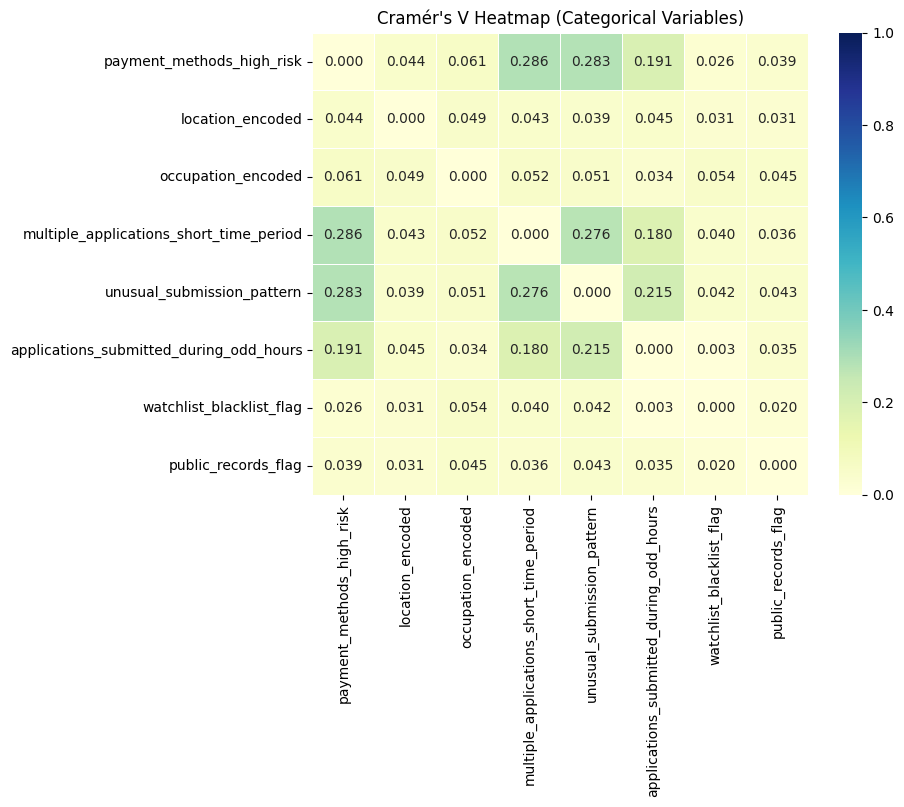

In [ ]:
#Cramér's V (categorical variables)

def cramers_v(cat1, cat2):
    contingency_table = pd.crosstab(cat1, cat2)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    cramers_v_value = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v_value

cramers_v_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))

for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:
            value = cramers_v(data[col1], data[col2])
            cramers_v_matrix[i, j] = value
            cramers_v_matrix[j, i] = value

cramers_v_df = pd.DataFrame(cramers_v_matrix, index=categorical_columns, columns=categorical_columns)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1, fmt='.3f', linewidths=0.5)
plt.title("Cramér's V Heatmap (Categorical Variables)")
plt.show()

Chi-Square test

In [ ]:
df_cleaned = data.dropna()

def chi_square_all(df):
    variables = df.columns
    results = []

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i < j:
                contingency_table = pd.crosstab(df[var1], df[var2])

                chi2, p, dof, expected = chi2_contingency(contingency_table)

                if p < 0.05:
                    results.append({
                        'Variable1': var1,
                        'Variable2': var2,
                        'Chi2 Statistic': chi2,
                        'p-value': p,
                        'Degrees of Freedom': dof
                    })

    return pd.DataFrame(results)

chi_square_results = chi_square_all(df_cleaned)
print(chi_square_results)

                                  Variable1                      Variable2  \
0                              income_level                     fico_score   
1                              income_level      avg_balance_last_12months   
2                              income_level  number_of_delinquent_accounts   
3                              income_level             occupation_encoded   
4                              income_level          credit_history_length   
..                                      ...                            ...   
68               unusual_submission_pattern       watchlist_blacklist_flag   
69               unusual_submission_pattern            public_records_flag   
70  applications_submitted_during_odd_hours            public_records_flag   
71                         location_encoded             occupation_encoded   
72      time_between_account_open_and_trade          credit_history_length   

    Chi2 Statistic       p-value  Degrees of Freedom  
0     2.

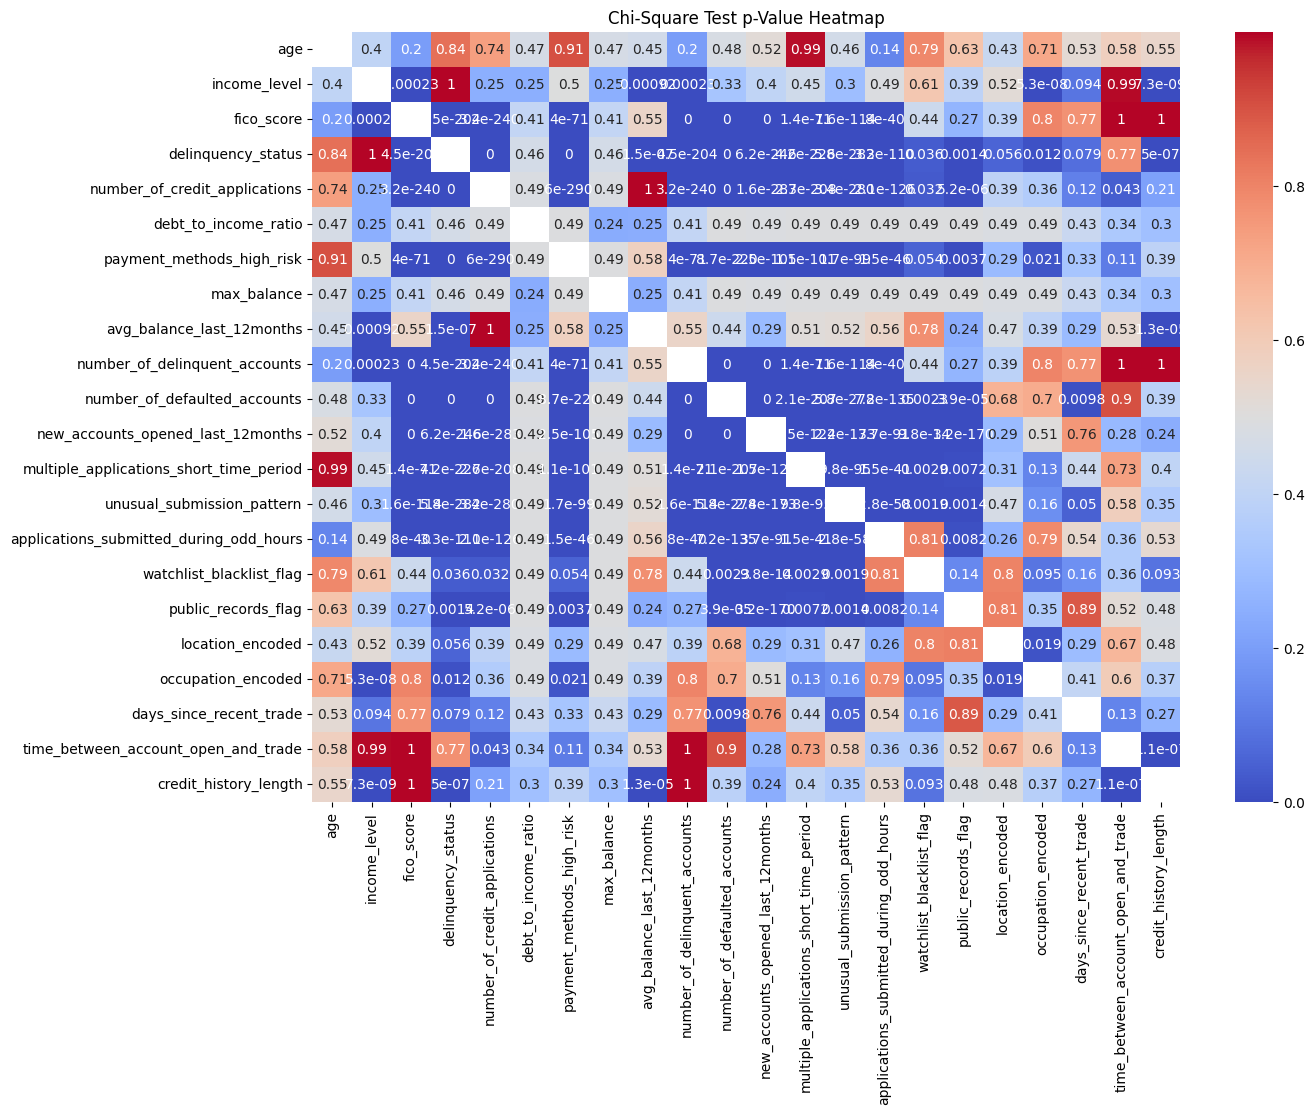

In [ ]:
df_cleaned = data.dropna()

def chi_square_all(df):
    variables = df.columns
    p_values = pd.DataFrame(np.nan, index=variables, columns=variables)

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i < j:
                contingency_table = pd.crosstab(df[var1], df[var2])

                chi2, p, dof, expected = chi2_contingency(contingency_table)

                p_values.loc[var1, var2] = p
                p_values.loc[var2, var1] = p

    return p_values
chi_square_p_values = chi_square_all(df_cleaned)

plt.figure(figsize=(14, 10))
sns.heatmap(chi_square_p_values, annot=True, cmap="coolwarm", cbar=True, mask=np.triu(chi_square_p_values.isna()), fmt=".2g")
plt.title("Chi-Square Test p-Value Heatmap")
plt.show()


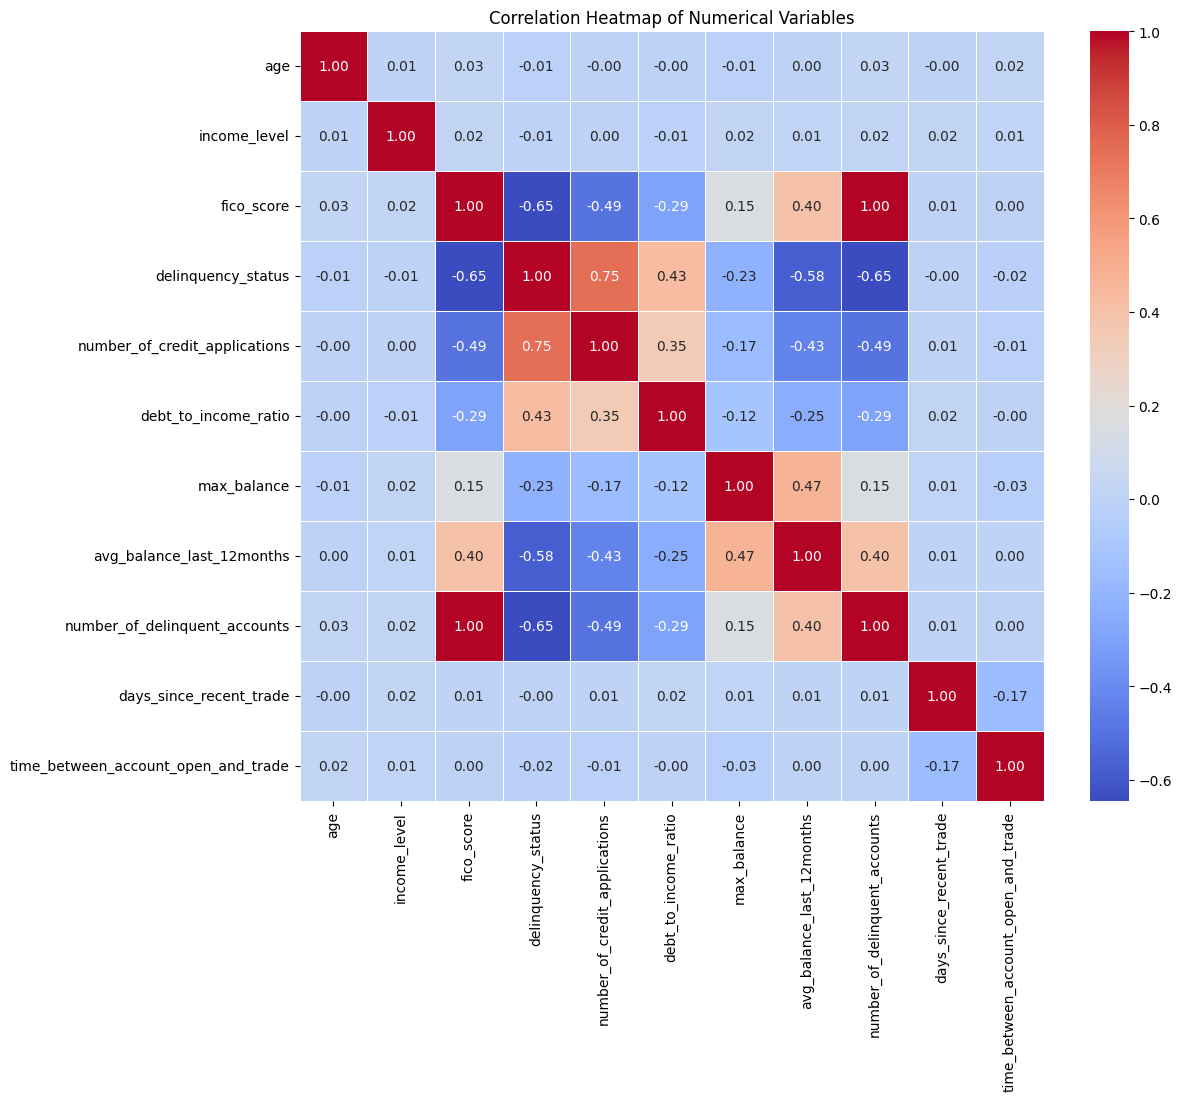

In [ ]:
#check multicollinearity in between numerical variables by using person correlation heatmap

numerical_cols = ['age', 'income_level', 'fico_score','delinquency_status','number_of_credit_applications',
                   'debt_to_income_ratio','max_balance','avg_balance_last_12months',
                    'number_of_delinquent_accounts','days_since_recent_trade','time_between_account_open_and_trade']

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()